# Machine Learning : Projet Real Estate

### Tree and Random Forest

##### Membres : Zakaria Kabara - Valentin Lhote - Omar Mousteau - Marijan Sorić

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#import tensorflow as tf
import random
from sklearn.impute import KNNImputer
from tqdm import tqdm

In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

## Modèles :

In [3]:
X = pd.read_csv('X_train.csv')
Xfinal = pd.read_csv('X_test.csv')
y = pd.read_csv('y_test.csv')

In [4]:
X.set_index('id_annonce',inplace=True)
Xfinal.set_index('id_annonce',inplace=True)
y.set_index('id_annonce',inplace=True)

In [5]:
# Sélection des 10 meilleures caractéristiques
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)

# Affichage des noms des colonnes sélectionnées
feature_names = list(X.columns[selector.get_support()])
print(feature_names)

['nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'nb_parking_places', 'nb_photos', 'nb_terraces', 'property_type_appartement', 'property_type_terrain', 'property_type_terrain à bâtir', 'city']


/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# On split les données
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# métriques
from sklearn.metrics import mean_absolute_percentage_error
def custom_metric_function(y_true, y_pred):
    return mean_absolute_percentage_error(np.exp(y_true), np.exp(y_pred))*100

from sklearn.metrics import make_scorer
custom_score=make_scorer(custom_metric_function, greater_is_better=False)

# Comparaison Modèles

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
#from lightgbm import LGBMRegressor

#commentés lorsqu'ils sont longs à train pour la boucle en dessous
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('ADA', AdaBoostRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))]
            #("LightGBM", LGBMRegressor())]
    

for name, regressor in models:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    error = custom_metric_function(y_test, y_pred)
    print('Score for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
sns.displot(np.log(y), kde=True)#, fit=sns.stats.norm)
plt.xlabel("$log(price)$")
plt.title("Avec transformation logarithmique")

### Exemple de modèle simple

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred_ = model.predict(X_test)

/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
print(custom_metric_function((y_test), (y_pred_)),'pourcentage d erreurs')

40.251616192144205 pourcentage d erreurs


/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array w

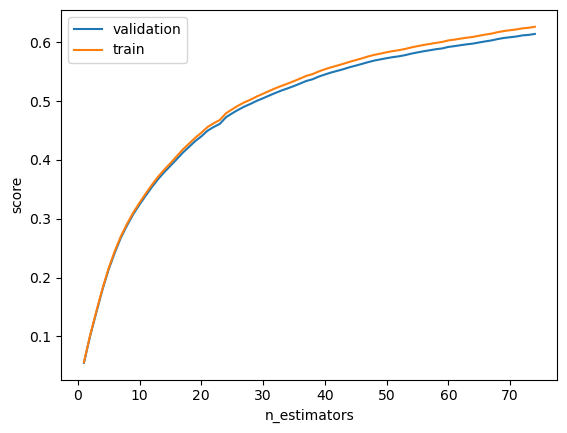

In [24]:
from sklearn.model_selection import validation_curve
k = np.arange(1,75)
train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_estimators', param_range=k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [28]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array w

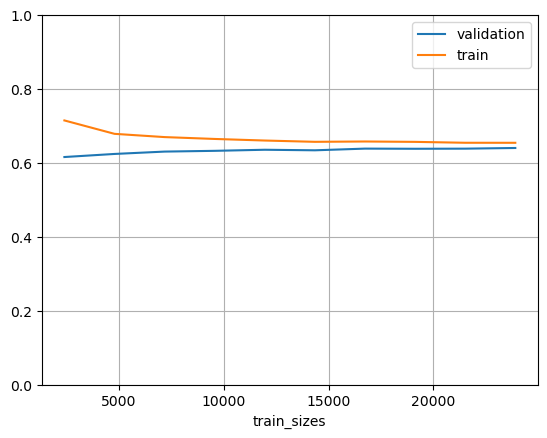

In [32]:
fig, ax = plt.subplots()

# Tracer les données sur l'objet Axes
ax.plot(N, val_score.mean(axis=1), label='validation')
ax.plot(N, train_score.mean(axis=1), label='train')

# Définir les limites de l'axe des y
ax.set_ylim([0, 1])

plt.xlabel('train_sizes')
plt.legend()
plt.grid()
plt.show()

In [46]:
y_pred = float(y.mean())
y_pred = y_pred*np.ones((7474,1))

In [45]:
y_test.shape

(7474, 1)

In [47]:
custom_metric_function(y_test, y_pred)

79.8644147723425

In [ ]:
plt.figure(figsize=(8, 6))
#xgb.plot_importance(xgbr, importance_type='gain')

# Extraire les 10 variables les plus importantes
importance = model.feature_importances_
indices = importance.argsort()[-10:][::-1]
top_10_names = [X_train.columns[i] for i in indices]
top_10_importance = importance[indices]

# Afficher l'importance des 10 variables les plus importantes
plt.figure(figsize=(8, 6))
plt.barh(range(len(top_10_importance)), top_10_importance, align='center')
plt.yticks(range(len(top_10_importance)), top_10_names)
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.title('10 Variables les plus importantes')
plt.show()

### XGB

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# test Marijan
params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.1,0.2,0.3,0.4,0.5],
        #   'n_estimators': [300,400],
          #  'seed':[5,10,20]}
          'min_split_loss' : [0, 0.3,0.5,0.7],
          'subsample' : [0.4,0.5,0.6,0.8,1]}
""""parametres={'learning_rate': 0.07, 'max_depth': 13, 'n_estimators': 400, 'seed': 10}"""
"""{'learning_rate': 0.08, 'max_depth': 13, 'n_estimators': 400, 'seed': 5}"""
#xgbr = xgb.XGBRegressor(learning_rate= 0.08, max_depth= 13, n_estimators= 400, seed=5)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring=custom_score, 
                   verbose=1,
                  cv=4)


# clf = RandomizedSearchCV(estimator=xgbr, 
#                    param_distributions=params,
#                    scoring=custom_score, 
#                    verbose=1,
#                    cv=4,
#                    n_iter=100)


xgbr.fit(X_train, y_train)


In [ ]:
#clf.best_params_

In [ ]:
y_pred=clf.best_estimator_.predict(X_test)
y_pred=xgbr.predict(X_test)
print('Score challenge=',custom_metric_function(y_test, y_pred))
print('R2=',r2_score(y_test,y_pred))

### Rendre la solution

On appelle modèle le modèle final, hyper-paramétré. 

In [ ]:
# On l'entraîne sur la totalité du jeu d'entraînement (X,y)

model.fit(X,y)

# Prédiction finale sur le X test
y_pred_final= model.predict(Xfinal)

# Attention il faut bien passer au log avant de donner la solution
y_pred_final = np.exp(y_pred_final)


In [ ]:
sns.displot(y_pred_final)

In [ ]:
y_pred_final = pd.DataFrame(y_pred_final)
y_pred_final.set_index(Xfinal.index, inplace=True)
y_pred_final.rename(columns={y_pred_final.columns[0]: "price"}, inplace=True)

# Attention à bien changer le nom du fichier avant de l'enregister !
# Ici c'est 'y_solution3-ms.csv'

In [ ]:
#On enregistre en .csv
y_pred_final=pd.DataFrame(y_pred_final)
y_pred_final.to_csv('y_solution3-ms.csv',index=True, decimal=',')

### Random Forests

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# random_forest = RandomForestRegressor()
# random_forest.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import mean_absolute_percentage_error

# def custom_metric_function(y_true, y_pred):
#     return mean_absolute_percentage_error(y_true, y_pred)*100

# print(custom_metric_function(y_test, y_pred))

#### Random Forest with Best Params

In [ ]:
# #The number of trees in the forest.
# #parameters = {'n_estimators' : [25,50,100,200]} # Devient très long pour plus de 200
# parameters={'bootstrap': [True, False],
#  'criterion' : ['absolute_error'],
#  'max_depth': [10, 50,  100, None],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [50, 100, 200]}

In [ ]:
# random_forest_1 = RandomForestRegressor()
# grid = GridSearchCV(random_forest_1, parameters)

# grid.fit(X_train, y_train)

### XGBoost

In [ ]:
#pip install xgboost

In [ ]:
# #from xgboost import XGBRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_percentage_error

# def custom_metric_function(y_true, y_pred):
#     return mean_absolute_percentage_error(np.exp(y_true), np.exp(y_pred))*100

# XGB = GradientBoostingRegressor()
# XGB.fit(X_train, y_train)
# y_pred = XGB.predict(X_test)
# error = custom_metric_function(y_test, y_pred)
# print('Score : '+error*100+'%')

In [ ]:
# y_train.to_csv('my_data.csv', index=True)

In [ ]:
# X_train=pd.DataFrame(X_train, dtype='float64')

In [ ]:
# import xgboost as xgb
# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 200, 300],
#            'colsample_bytree': [0.3, 0.7]}
# xgbr = xgb.XGBRegressor(seed = 20)
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# clf.fit(X_train, y_train)


In [ ]:
# y_pred = clf.predict(X_test)
# print('mean absolute error =',mae(y_test, y_pred))
# print('r2 score =', r2_score(y_test, y_pred))

In [ ]:
# clf.best_params_

In [ ]:
# y_pred=clf.best_estimator_.predict(X_test)

# print(custom_metric_function(y_test, y_pred))